In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("income.csv")

In [3]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

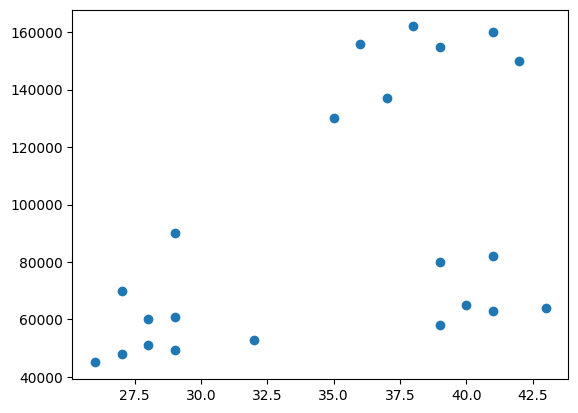

In [5]:
plt.scatter(df.Age, df['Income($)'])

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [10]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


Text(0, 0.5, 'Income ($)')

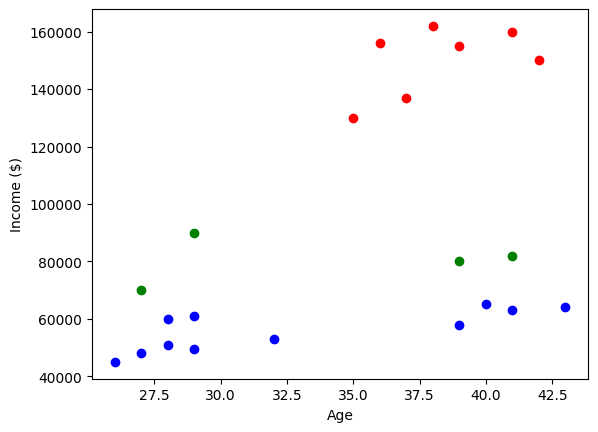

In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income ($)')


Như chúng ta thấy thì dữ liệu bị phân cụm sai bởi vì kích thước giữa các trục là không tương xứng với nhau như trục Income thì số liệu quá lớn (40000 - 160000) còn ở cột Age (27.5 - 42.5) do đó dữ liệu khi phân cụm sẽ có sai sót. Vì vậy chúng ta cần phải tiền xử lý dữ liệu khi gặp trường hợp tương tự.

In [12]:
##Tiền xử lý bằng MinMaxScaler đưa dữ liệu về khoảng từ 0-1
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [14]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [15]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [16]:
new_df = df.drop(['cluster'], axis = 'columns')

In [17]:
new_kn = KMeans(n_clusters = 3)
new_kn

KMeans(n_clusters=3)

In [18]:
y_new = new_kn.fit_predict((new_df[['Age', 'Income($)']]))

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
new_df['cluster'] = y_new
new_df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Text(0, 0.5, 'Income ($)')

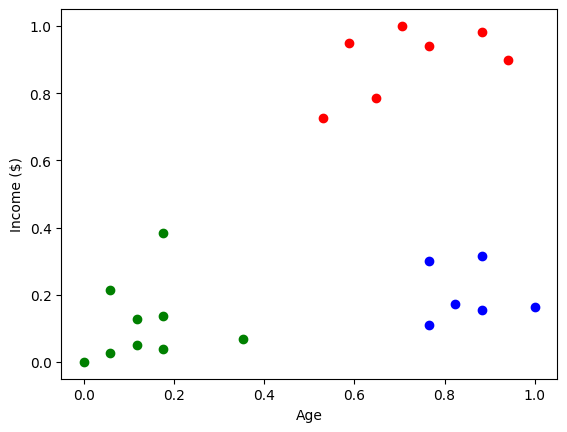

In [21]:
df1 = new_df[new_df.cluster == 0]
df2 = new_df[new_df.cluster == 1]
df3 = new_df[new_df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color = 'green')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Income ($)')

Sau khi chúng ta tiền xử lý dữ liệu thì quá trình phân cụm đã chính xác hơn so với lần đầu.

In [29]:
##Tìm số cụm chính xác với phương pháp elbow 
sse = []
k_rng = range(1, 10)
for k in range(1, 10):
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [27]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.26217927623452136,
 0.21055478995472493,
 0.17299621932455467,
 0.14087951725103115,
 0.10188787724979426]

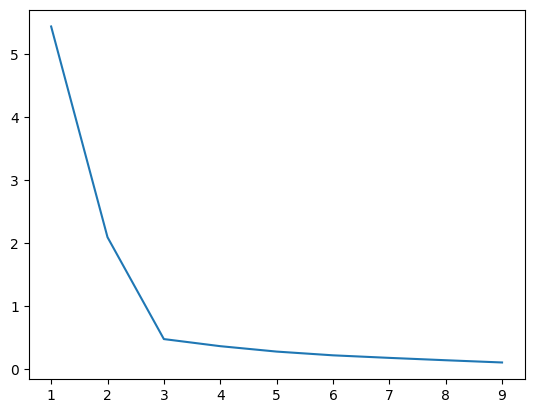

In [30]:
plt.plot(k_rng, sse)

Theo đồ thị trên thì ta thấy được k = 3 sẽ tốt nhất cho bài toán hiện tại